<a href="https://colab.research.google.com/github/HariPrasathHari/Tuberculosis_dataset/blob/master/vgg_19_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Mount drive /imports. Dynamic fields 

from google.colab import drive
drive.mount('/content/gdrive')

import torch
from torch.autograd import Variable
from torch.autograd import Function
from torchvision import models
from torchvision import utils
import cv2
import sys
import numpy as np
import argparse
import torch.nn as nn 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


batch_size = 2 #@param {type:"slider", min:1, max:100, step:1}

load_pretrained_model = False #@param {type:"boolean"}

train_on_gpu =True #@param {type:"boolean"}

valid_size =0.2 #@param {type:"slider", min:0.1, max:0.5, step:0.05}


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#@title load saved model

import torch.nn as nn
model = models.vgg19(pretrained=True)

model.classifier[6] =   nn.Linear(in_features=4096, out_features=2)


state_dict = torch.load('gdrive/My Drive/last.pt')
model.load_state_dict(state_dict)
# model.cuda()
pre_model = model 
print(model.classifier)



Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)


In [0]:
#@title Transform and Load data 
import torch
import numpy as np
import numpy
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
  
import matplotlib.pyplot as plt
%matplotlib inline

transform =  transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

]
)
dataset =  datasets.ImageFolder("gdrive/My Drive/tb",transform)
dataloader = torch.utils.data.DataLoader(dataset,batch_size = batch_size ,shuffle = True)


print(dataset)
print(len(dataloader))
num_train = len(dataset) # 800
num_train = 800
num_workers = 0 
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

classes = ['postive','normal']

print(len(train_loader))
print(len(valid_loader))


data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.size())


Dataset ImageFolder
    Number of datapoints: 800
    Root Location: gdrive/My Drive/tb
    Transforms (if any): Compose(
                             Resize(size=255, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None
400
320
80
torch.Size([2, 3, 224, 224])


In [0]:
#@title Load saved model def loss/optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
state_dict = torch.load('gdrive/My Drive/last.pt')
model.load_state_dict(state_dict)
optimizer = optim.Adam(model.parameters(),lr=0.0001)
import os

In [0]:
model.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

In [0]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():

  
  model.eval()
  for data, target in dataloader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(dataloader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.284663

over all  Accuracy of postive: 95% (386/406)
over all  Accuracy of normal: 96% (382/394)

Over all Accuracy : 96% (768/800)


In [0]:
#@title Track loss and train
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model.eval()

for data, target in train_loader:
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    for i in range(data.size(0)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(train_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.218043

over all  Accuracy of postive: 94% (311/328)
over all  Accuracy of normal: 98% (306/312)

Over all Accuracy : 96% (617/640)


In [0]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
#   model.eval()

  for data, target in valid_loader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(valid_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.066620

over all  Accuracy of postive: 96% (75/78)
over all  Accuracy of normal: 92% (76/82)

Over all Accuracy : 94% (151/160)
Test Loss: 0.066620

over all  Accuracy of postive: 96% (75/78)
over all  Accuracy of normal: 92% (76/82)

Over all Accuracy : 94% (151/160)


In [0]:
#@title Track loss and test
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
#   model.eval()

  for data, target in train_loader:
      if train_on_gpu:
          data, target = data.cuda(), target.cuda()
      output = model(data)
      loss = criterion(output, target)
      test_loss += loss.item()*data.size(0)
      _, pred = torch.max(output, 1)    
      correct_tensor = pred.eq(target.data.view_as(pred))
      correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
      for i in range(data.size(0)):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  test_loss = test_loss/len(train_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))

  for i in range(2):
      if class_total[i] > 0:
          print('over all  Accuracy of %5s: %2d%% (%2d/%2d)' % (
              classes[i], 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('over all Accuracy of %5s: N/A (no training examples)' % (classes[i]))

  print('\nOver all Accuracy : %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.218043

over all  Accuracy of postive: 94% (311/328)
over all  Accuracy of normal: 98% (306/312)

Over all Accuracy : 96% (617/640)


In [0]:
test_transforms  =  transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

]
)

In [0]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [0]:
def get_random_images(num):
    data = datasets.ImageFolder('gdrive/My Drive/tb', transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

## Sample prediction for random images 

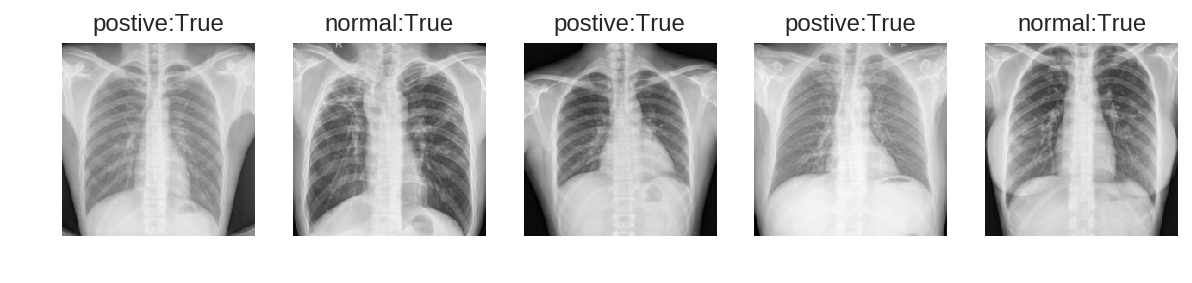

In [0]:
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig=plt.figure(figsize=(10,10))
for ii in range(len(images)):
    image = to_pil(images[ii])
    index = predict_image(image)
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)
plt.show()

In [0]:
device='cuda'

In [0]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.transpose((1, 2, 0)) 

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)
    image = np.clip(image,0,255)
    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax